In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-05.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.912302,6.904833,50.915445,6.902740,2020-05-07 09:39:02,2020-05-07 10:19:01,40.0,379.0,29299872,29618832,2938.0,NaN,BIKE 21648,1196
1,50.915445,6.902740,50.910212,6.908267,2020-05-08 14:57:02,2020-05-08 17:04:02,127.0,699.0,29618832,29657559,1718.0,NaN,BIKE 21648,1209
2,50.910212,6.908267,50.915237,6.902807,2020-05-08 17:19:03,2020-05-08 17:31:02,12.0,677.0,29657559,29664207,15.0,NaN,BIKE 21648,1163
3,50.915237,6.902807,50.911548,6.928077,2020-05-09 12:49:02,2020-05-09 15:07:02,138.0,1819.0,29664207,29687645,1158.0,NaN,BIKE 21648,1162
4,50.911548,6.928077,50.915781,6.919390,2020-05-09 15:32:02,2020-05-09 15:42:01,10.0,770.0,29687645,29694025,25.0,NaN,BIKE 21648,1143


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

70002

In [14]:
len(out_distances_total)

9411

In [15]:
len(out_rides)

8180

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

13006

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

4585

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

13.0       83
14.0       80
11.0       71
7.0        71
8.0        70
15.0       70
9.0        69
12.0       66
19.0       62
16.0       61
17.0       60
29.0       58
5.0        56
18.0       54
10.0       54
21.0       52
27.0       48
26.0       48
6.0        48
20.0       45
32.0       44
25.0       43
24.0       43
4.0        42
36.0       41
23.0       41
22.0       40
35.0       39
408.0      37
37.0       37
           ..
6558.0      1
9682.0      1
5626.0      1
5652.0      1
5860.0      1
5861.0      1
6716.0      1
7222.0      1
5474.0      1
4320.0      1
6036.0      1
7657.0      1
5411.0      1
11711.0     1
6912.0      1
5497.0      1
6284.0      1
8001.0      1
6380.0      1
5357.0      1
5329.0      1
10695.0     1
6255.0      1
5275.0      1
5330.0      1
9681.0      1
5178.0      1
6429.0      1
6930.0      1
8678.0      1
Name: distance, Length: 6713, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

4826

In [23]:
len(out_distances + out_rides)

13006

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

18.579469158024057


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56996 entries, 0 to 56995
Data columns (total 15 columns):
index                   56996 non-null int64
lat_begin               56996 non-null float64
lng_begin               56996 non-null float64
lat_end                 56996 non-null float64
lng_end                 56996 non-null float64
ride_begin              56996 non-null object
ride_end                56996 non-null object
ride_time               56996 non-null float64
distance                56996 non-null float64
uid_begin               56996 non-null int64
uid_end                 56996 non-null int64
standing_before_ride    56996 non-null float64
address                 225 non-null object
name                    56996 non-null object
available_bikes         56996 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 6.5+ MB


In [27]:
df_c['distance'].value_counts()

408.0      37
540.0      35
851.0      34
491.0      33
453.0      32
723.0      32
575.0      32
856.0      32
798.0      32
578.0      32
808.0      31
1525.0     31
825.0      31
555.0      31
820.0      31
395.0      31
759.0      31
1116.0     31
271.0      31
560.0      30
746.0      30
751.0      30
739.0      30
598.0      30
1427.0     30
717.0      30
961.0      30
1119.0     30
596.0      30
542.0      29
           ..
7657.0      1
5036.0      1
5411.0      1
11711.0     1
5497.0      1
6284.0      1
8001.0      1
6380.0      1
5357.0      1
5329.0      1
10695.0     1
6255.0      1
5275.0      1
5330.0      1
9681.0      1
5178.0      1
6429.0      1
6930.0      1
9682.0      1
6558.0      1
8659.0      1
4718.0      1
6244.0      1
6829.0      1
4853.0      1
11107.0     1
4583.0      1
6816.0      1
7115.0      1
7564.0      1
Name: distance, Length: 6498, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

12.0     1933
10.0     1928
8.0      1911
11.0     1904
9.0      1843
13.0     1818
14.0     1758
15.0     1755
7.0      1728
16.0     1695
17.0     1638
18.0     1576
19.0     1527
20.0     1457
21.0     1359
6.0      1358
22.0     1300
23.0     1262
24.0     1151
25.0     1142
26.0     1092
27.0     1070
28.0      959
29.0      922
30.0      868
5.0       814
32.0      706
31.0      705
33.0      658
34.0      559
         ... 
450.0       1
588.0       1
534.0       1
585.0       1
581.0       1
518.0       1
616.0       1
436.0       1
540.0       1
341.0       1
668.0       1
451.0       1
615.0       1
483.0       1
528.0       1
567.0       1
584.0       1
601.0       1
687.0       1
464.0       1
632.0       1
471.0       1
516.0       1
652.0       1
325.0       1
466.0       1
424.0       1
465.0       1
449.0       1
635.0       1
Name: ride_time, Length: 660, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[73,
 107,
 167,
 205,
 229,
 297,
 349,
 526,
 564,
 600,
 613,
 735,
 742,
 764,
 849,
 897,
 902,
 910,
 984,
 1013,
 1034,
 1139,
 1219,
 1293,
 1361,
 1421,
 1436,
 1444,
 1504,
 1512,
 1568,
 1598,
 1626,
 1649,
 1724,
 1795,
 1808,
 1886,
 1887,
 1895,
 1896,
 1908,
 1926,
 1953,
 2043,
 2045,
 2137,
 2208,
 2236,
 2251,
 2289,
 2329,
 2349,
 2364,
 2399,
 2487,
 2554,
 2603,
 2624,
 2688,
 2689,
 2710,
 2727,
 2758,
 2811,
 2885,
 3061,
 3243,
 3250,
 3272,
 3273,
 3279,
 3338,
 3383,
 3423,
 3428,
 3636,
 3642,
 3651,
 3675,
 3700,
 3708,
 3709,
 3758,
 3783,
 3957,
 3977,
 3978,
 3989,
 4066,
 4070,
 4093,
 4100,
 4200,
 4252,
 4323,
 4337,
 4348,
 4375,
 4386,
 4429,
 4479,
 4486,
 4488,
 4529,
 4543,
 4604,
 4615,
 4625,
 4728,
 4875,
 4876,
 4878,
 4950,
 4961,
 4972,
 4973,
 4977,
 5019,
 5126,
 5177,
 5185,
 5233,
 5238,
 5309,
 5333,
 5339,
 5342,
 5350,
 5351,
 5352,
 5446,
 5499,
 5539,
 5560,
 5867,
 5880,
 5883,
 5920,
 5963,
 5989,
 6032,
 6036,
 6081,
 6098,
 6138

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
73,95,50.996455,6.914353,50.997902,6.912396,2020-05-21 22:47:02,2020-05-21 23:12:02,25.0,211.0,30086606,30111321,456.0,NaN,BIKE 21633,1110
107,135,50.904123,6.915867,50.906482,6.917649,2020-05-18 14:33:02,2020-05-18 18:21:01,228.0,291.0,29905527,29979871,2649.0,NaN,BIKE 21985,1150
167,209,50.948329,6.941661,50.948223,6.944770,2020-05-28 20:03:02,2020-05-28 20:17:01,14.0,218.0,30346126,30347477,23.0,NaN,BIKE 22152,1119
205,250,50.909539,6.963644,50.911460,6.962845,2020-05-08 14:20:02,2020-05-08 14:25:03,5.0,221.0,29655702,29656158,9.0,NaN,BIKE 22817,1179
229,276,50.937136,6.961023,50.936125,6.957759,2020-05-18 10:21:01,2020-05-18 10:25:02,4.0,255.0,29962352,29963355,41.0,NaN,BIKE 22817,1134
297,354,50.933898,6.904151,50.931999,6.901749,2020-05-18 20:07:02,2020-05-18 20:15:02,8.0,270.0,29948780,29986681,1473.0,NaN,BIKE 22997,1150
349,413,50.921402,6.959774,50.923486,6.959223,2020-05-09 17:23:02,2020-05-09 17:53:02,30.0,235.0,29698384,29701021,19.0,NaN,BIKE 21451,1152
526,635,50.965729,6.949330,50.966460,6.953157,2020-05-01 14:40:02,2020-05-01 22:04:01,444.0,280.0,29462763,29491134,880.0,NaN,BIKE 22809,1261
564,684,50.966536,6.985377,50.966081,6.981263,2020-05-20 10:04:02,2020-05-20 10:53:01,49.0,293.0,30032045,30038288,455.0,NaN,BIKE 22809,1158
600,725,50.911736,6.937939,50.910472,6.941487,2020-05-05 17:53:01,2020-05-05 18:00:02,7.0,286.0,29576870,29578862,51.0,NaN,BIKE 22912,1174


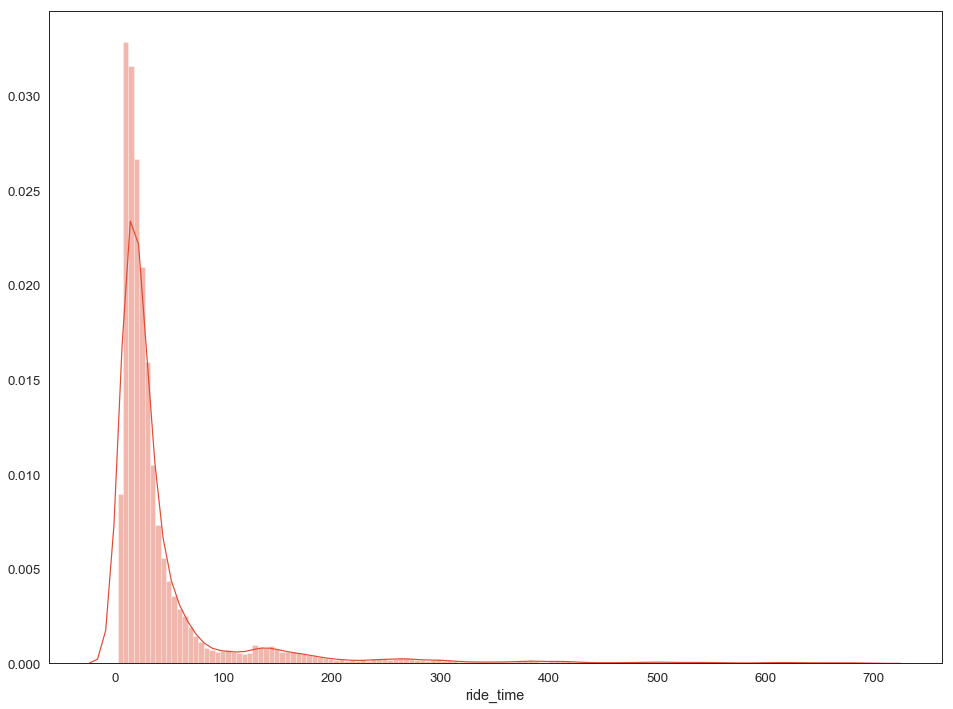

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

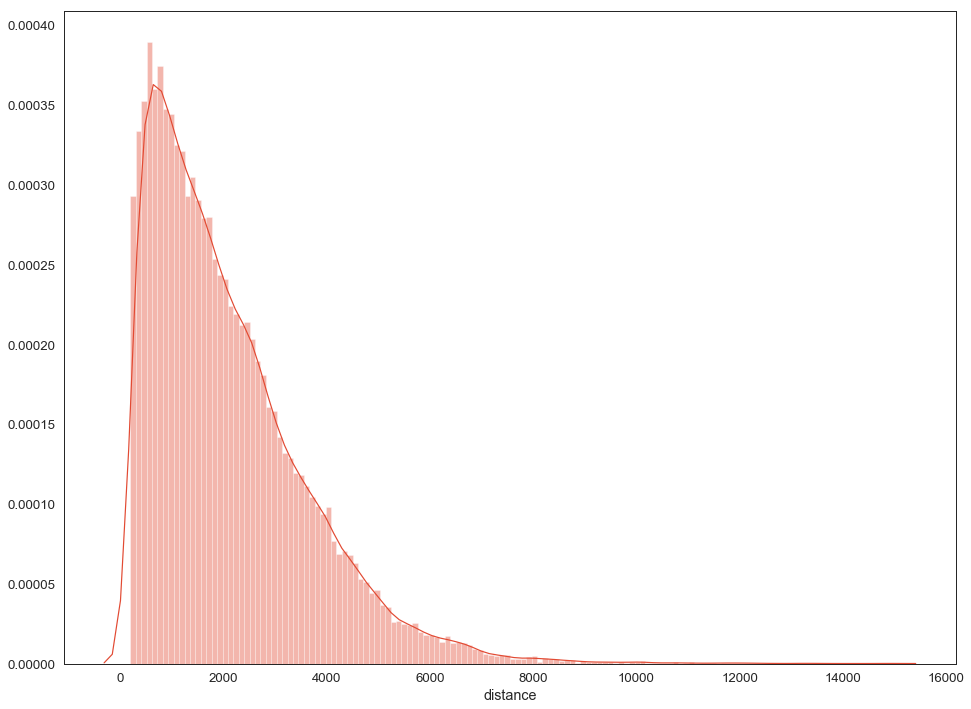

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
813,985,50.956502,7.010873,50.959623,6.995976,2020-05-28 19:56:01,2020-05-28 20:26:02,30.0,1100.0,30292102,30347212,1694.0,Köln - Vincenzstraße 20,BIKE 22715,1101
900,1088,50.944123,6.927585,50.948323,6.911960,2020-05-16 10:18:02,2020-05-16 10:36:02,18.0,1191.0,29880099,29889271,744.0,Venloer Str. 177,BIKE 22121,1203
1007,1214,50.936582,6.932539,50.930724,6.897939,2020-05-05 15:46:01,2020-05-05 16:21:02,35.0,2511.0,29568980,29575228,234.0,"Moltkestraße Haltestelle, Köln",BIKE 22261,1194
1275,1533,50.925863,6.915253,50.976842,6.932496,2020-05-20 15:42:01,2020-05-20 17:16:02,94.0,5798.0,30025104,30051379,1150.0,Leiblplatz 5,BIKE 21548,1161
1794,2199,50.933988,6.994412,50.936319,6.985960,2020-05-03 18:35:02,2020-05-03 18:41:02,6.0,647.0,29531619,29532082,8.0,An der Pulvermühle 19,BIKE 21835,1193
1798,2204,50.937143,6.998917,50.955779,7.010391,2020-05-04 17:06:02,2020-05-04 17:21:02,15.0,2223.0,29549954,29552960,43.0,"50.937627, 6.998525",BIKE 21835,1176
1803,2209,50.942438,7.010051,50.939107,7.008107,2020-05-06 14:25:02,2020-05-06 14:32:02,7.0,395.0,29588053,29597938,749.0,Eythstraße 75,BIKE 21835,1213
1837,2281,50.950981,6.957686,50.930734,6.946835,2020-05-17 23:05:02,2020-05-18 00:15:02,70.0,2377.0,29938267,29955977,367.0,Ebertplatz 13,BIKE 21835,1150
1863,2312,50.936807,6.974960,50.939750,6.998084,2020-05-25 15:55:02,2020-05-25 16:11:02,16.0,1654.0,30212247,30220191,229.0,Deutsche Freiheit 93,BIKE 21835,1140
3013,3964,50.912641,7.001925,50.915694,6.992205,2020-05-09 10:30:02,2020-05-09 10:37:01,7.0,762.0,29662986,29683653,1042.0,Köln - BIKE 21952,BIKE 21952,1160


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
1886,2337,50.941218,6.997178,50.942693,6.995192,2020-05-09 17:43:02,2020-05-09 17:47:02,4.0,215.0,29695041,29700718,106.0,NaN,BIKE 22725,1136
1887,2338,50.942693,6.995192,50.941245,6.997230,2020-05-09 17:56:02,2020-05-09 18:01:02,5.0,215.0,29700718,29701518,9.0,NaN,BIKE 22725,1157
4933,6268,50.968460,6.906004,50.970730,6.909476,2020-05-01 16:25:02,2020-05-01 16:30:02,5.0,351.0,29484417,29486196,67.0,NaN,BIKE 22358,1237
4934,6269,50.970730,6.909476,50.968496,6.905927,2020-05-01 20:09:02,2020-05-01 20:29:01,20.0,351.0,29486196,29492919,219.0,NaN,BIKE 22358,1220
5608,7059,50.968207,6.967752,50.956278,6.961341,2020-05-06 13:18:02,2020-05-06 13:54:01,36.0,1401.0,29579541,29596488,1139.0,NaN,BIKE 22131,1177
5609,7060,50.956278,6.961341,50.967377,6.970809,2020-05-06 14:01:02,2020-05-06 14:16:02,15.0,1401.0,29596488,29597558,7.0,NaN,BIKE 22131,1185
5851,7329,50.930231,6.961222,50.930998,6.955709,2020-05-25 10:49:03,2020-05-25 17:51:02,422.0,396.0,30199749,30223871,915.0,NaN,BIKE 22029,1162
5852,7330,50.930998,6.955709,50.931636,6.961260,2020-05-25 18:08:02,2020-05-25 18:16:03,8.0,396.0,30223871,30224971,17.0,NaN,BIKE 22029,1142
8154,10361,50.984169,6.932463,50.988120,6.941073,2020-05-20 19:02:02,2020-05-20 19:28:02,26.0,746.0,30048709,30060147,185.0,NaN,BIKE 21844,1124
8155,10362,50.988120,6.941073,50.984194,6.932440,2020-05-20 19:32:01,2020-05-20 19:41:02,9.0,746.0,30060147,30060906,4.0,NaN,BIKE 21844,1141


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
6615,8214,50.992661,6.870238,50.940662,6.962751,2020-05-16 17:32:02,2020-05-16 17:47:02,15.0,8686.0,29898311,29905506,135.0,NaN,BIKE 22968,1114,6500.0
7861,10002,50.932898,6.928666,50.894106,6.903424,2020-05-17 09:47:02,2020-05-17 09:55:02,8.0,4664.0,29846793,29925812,3607.0,NaN,BIKE 21388,1203,4000.0
12193,15185,50.895212,6.901159,50.945427,6.943301,2020-05-22 14:41:01,2020-05-22 14:49:02,8.0,6319.0,30127746,30128734,17.0,NaN,BIKE 22939,1117,4000.0
20470,24995,50.916127,6.970536,50.982075,6.946109,2020-05-24 04:04:02,2020-05-24 04:15:02,11.0,7532.0,30172522,30181480,512.0,NaN,BIKE 22821,1147,6500.0
21258,25929,50.931172,6.926594,50.919199,6.911011,2020-05-01 17:43:03,2020-05-01 17:45:02,2.0,1723.0,29488169,29488553,10.0,NaN,BIKE 21976,1226,1500.0
23722,29021,50.915186,6.928118,50.937086,6.940549,2020-05-30 21:19:01,2020-05-30 21:21:01,2.0,2587.0,30422605,30431672,184.0,NaN,BIKE 22424,1097,1500.0
24769,30481,50.945777,6.903462,50.955836,6.921269,2020-05-31 18:41:01,2020-05-31 18:43:01,2.0,1676.0,30175151,30459502,11392.0,NaN,BIKE 22898,1165,1500.0
24789,30504,50.970521,6.885459,50.942743,6.923726,2020-05-07 18:04:02,2020-05-07 18:10:02,6.0,4091.0,29633154,29633777,7.0,NaN,BIKE 22700,1174,4000.0
24982,30723,50.964798,6.986864,50.929486,6.960808,2020-05-14 09:33:02,2020-05-14 09:36:02,3.0,4331.0,29810868,29822533,893.0,NaN,BIKE 22940,1181,1500.0
25109,30868,50.881389,6.917767,50.930239,6.925716,2020-05-23 10:03:01,2020-05-23 10:08:02,5.0,5462.0,30147336,30156794,750.0,NaN,BIKE 22720,1176,4000.0


In [46]:
len(unmatched_distances)

21

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                         56752
Venloer Str. 683                                1
Markmannsgasse 13 50667 Köln                    1
Severienstraße 93                               1
Köln - Aachener Str. 112                        1
Gleueler Str. 37350935 Köln                     1
Wiener Platz / Mülheimer Brücke                 1
Bergisch-Gladbacher-Str. 130                    1
Stadtwaldrampe                                  1
Hohen Zollern Ring                              1
Köln - Sonderburger Str. / Vincenzstr.          1
Bismarckstr. 67                                 1
Olpener Str. 65                                 1
Richard-Wagner-Str. 50674 Köln                  1
Lüttringhauserstraße 15                         1
mediapark                                       1
Köln - Mittelstr. 12                            1
Kalk-Mühlheimer-Straße 127                      1
Istanbulstraße 20                               1
Moltkestraße 66 50674 Köln                      1


In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-05.csv', sep=';', index=False) 

In [52]:
len(df_c)

56975